In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [14]:
HYPE = 'k'
HYPE_TITLE = 'K'
METHOD = 'knn'
METHOD_TITLE = 'KNN'

In [15]:
dir = f"../{METHOD}/results"
os.listdir(dir)

['data_manual_cv.csv']

In [16]:
df = pd.read_csv(os.path.join(dir, 'data_manual_cv.csv'))

In [17]:
df.columns

Index(['input_type', 'k', 'fit_time', 'eval_time', 'accuracy', 'test_set'], dtype='object')

In [18]:
new_df = df.drop(columns=['test_set', 'accuracy', 'eval_time', 'fit_time']).drop_duplicates()
print(len(df))
print(len(new_df))
new_df.reset_index(drop=True, inplace=True)

110
22


In [19]:
for i, row in new_df.iterrows():
    selection = df[np.logical_and(
        df[HYPE] == row[HYPE],
        df['input_type'] == row['input_type']
    )]
    assert(len(selection) == 5)
    new_df.loc[i, 'accuracy'] = selection['accuracy'].mean()
    new_df.loc[i, 'eval_time'] = selection['eval_time'].mean()
    new_df.loc[i, 'fit_time'] = selection['fit_time'].mean()
df = new_df

In [20]:
images_df = df[df['input_type'] == 'images']
features_df = df[df['input_type'] == 'features']

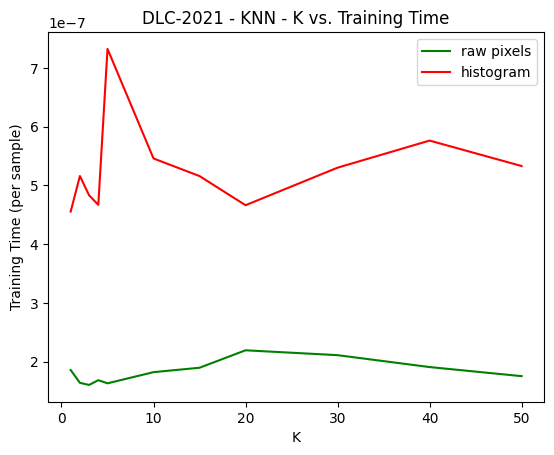

In [21]:
plt.title(f"DLC-2021 - {METHOD_TITLE} - {HYPE_TITLE} vs. Training Time")
plt.plot(images_df[HYPE], images_df['fit_time'], 'g-', label='raw pixels')
plt.plot(features_df[HYPE], features_df['fit_time'], 'r-', label='histogram')
plt.xlabel(HYPE_TITLE)
plt.ylabel('Training Time (per sample)')
plt.legend()
plt.show()

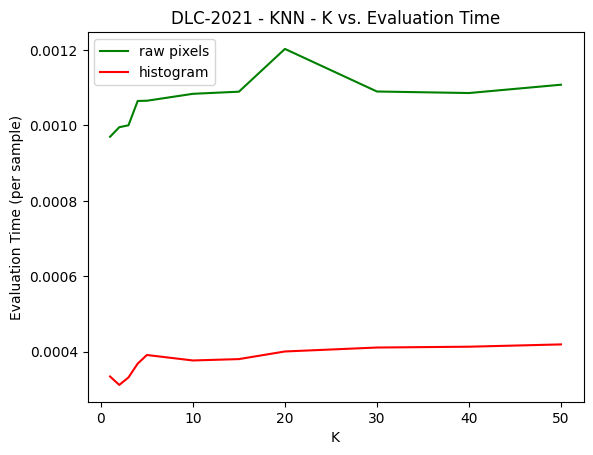

In [22]:
plt.title(f"DLC-2021 - {METHOD_TITLE} - {HYPE_TITLE} vs. Evaluation Time")
plt.plot(images_df['k'], images_df['eval_time'], 'g-', label='raw pixels')
plt.plot(features_df['k'], features_df['eval_time'], 'r-', label='histogram')
plt.xlabel(HYPE_TITLE)
plt.ylabel('Evaluation Time (per sample)')
plt.legend()
plt.show()

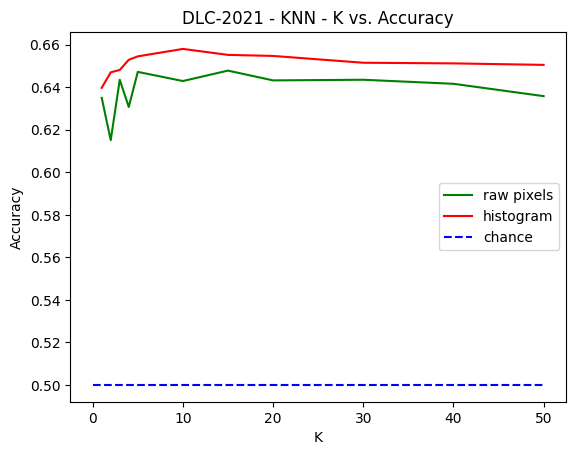

In [23]:
plt.title(f"DLC-2021 - {METHOD_TITLE} - {HYPE_TITLE} vs. Accuracy")
plt.plot(images_df['k'], images_df['accuracy'], 'g-', label='raw pixels')
plt.plot(features_df['k'], features_df['accuracy'], 'r-', label='histogram')
plt.plot((0, 50), (0.5, 0.5), 'b--', label='chance')
plt.xlabel(HYPE_TITLE)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
df.sort_values('accuracy').iloc[-1]

input_type    features
k                   10
accuracy         0.658
eval_time     0.000377
fit_time      0.000001
Name: 11, dtype: object